
# Thresholding an Image with RangeSlider

Using the RangeSlider widget to control the thresholding of an image.

The RangeSlider widget can be used similarly to the `.widgets.Slider`
widget. The major difference is that RangeSlider's ``val`` attribute
is a tuple of floats ``(lower val, upper val)`` rather than a single float.

See :doc:`/gallery/widgets/slider_demo` for an example of using
a ``Slider`` to control a single float.

See :doc:`/gallery/widgets/slider_snap_demo` for an example of having
the ``Slider`` snap to discrete values.


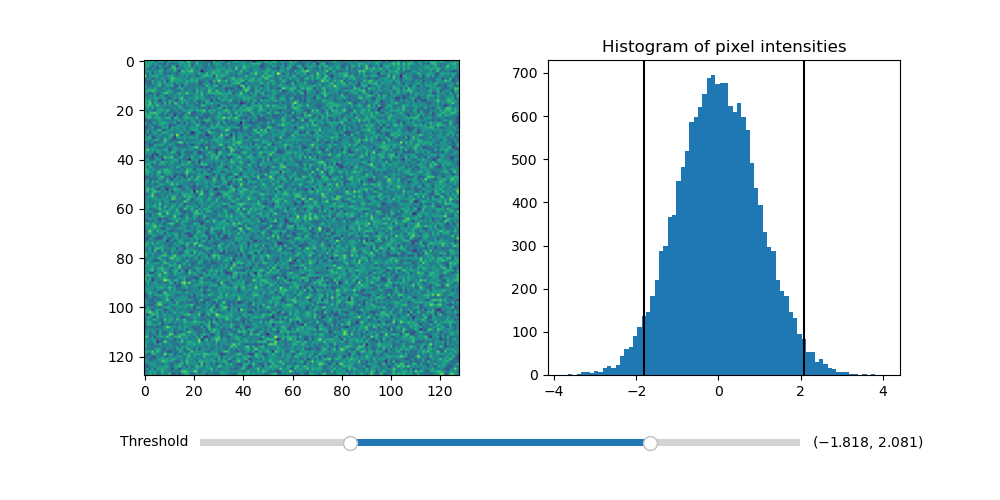

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import RangeSlider

# generate a fake image
np.random.seed(19680801)
N = 128
img = np.random.randn(N, N)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(bottom=0.25)

im = axs[0].imshow(img)
axs[1].hist(img.flatten(), bins='auto')
axs[1].set_title('Histogram of pixel intensities')

# Create the RangeSlider
slider_ax = fig.add_axes([0.20, 0.1, 0.60, 0.03])
slider = RangeSlider(slider_ax, "Threshold", img.min(), img.max())

# Create the Vertical lines on the histogram
lower_limit_line = axs[1].axvline(slider.val[0], color='k')
upper_limit_line = axs[1].axvline(slider.val[1], color='k')


def update(val):
    # The val passed to a callback by the RangeSlider will
    # be a tuple of (min, max)

    # Update the image's colormap
    im.norm.vmin = val[0]
    im.norm.vmax = val[1]

    # Update the position of the vertical lines
    lower_limit_line.set_xdata([val[0], val[0]])
    upper_limit_line.set_xdata([val[1], val[1]])

    # Redraw the figure to ensure it updates
    fig.canvas.draw_idle()


slider.on_changed(update)
plt.show()

In [2]:
update(val)

NameError: name 'val' is not defined

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.widgets.RangeSlider`



In [13]:
%matplotlib ipympl
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 20)

def f(x, A, B, C):
    return A*x**2 + B*x + C

fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, f(x, A=1, B=1, C=1))

def update(A = 1, B = 0, C = 0):
    line.set_ydata(f(x,A,B,C))
    fig.canvas.draw_idle()
    plt.grid()
    plt.show()
    
interact(update, A = (-4,4,0.1), B = (-4,4,0.1), C = (-4,4,0.1));

interactive(children=(FloatSlider(value=1.0, description='A', max=4.0, min=-4.0), FloatSlider(value=0.0, descr…

FloatRangeSlider(value=(0.0, 1.0), max=1.0, step=0.001)

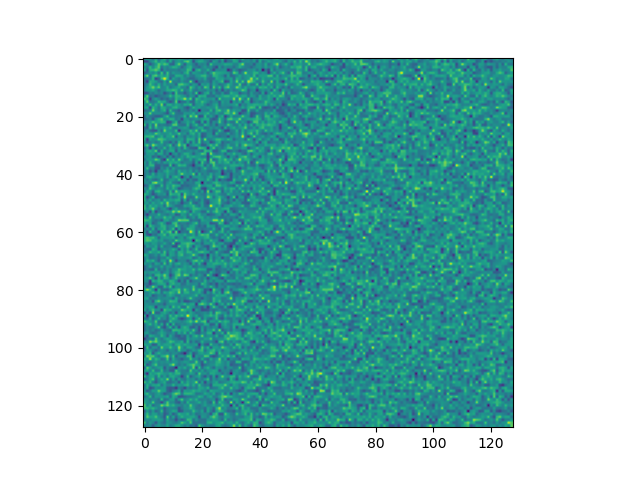

In [5]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import ipywidgets as widgets
#img = plt.imread("https://matplotlib.org/3.3.1/_images/stinkbug.png")
img = np.random.randn(N, N)

fig, ax = plt.subplots()
im = ax.imshow(img)
slider = widgets.FloatRangeSlider(value=(0.,1.), min=0, max=1., step=.001)
def update(change):
    im.norm.vmin = slider.value[0]
    im.norm.vmax = slider.value[1]
    fig.canvas.draw()
slider.observe(update, names='value')
display(slider)